In [369]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cebra
import cebra.datasets
from cebra import CEBRA


### 1. Load in Mthal data 
- CEBRA models 
- corrisponding embeddings (create from models and neural data)
- discerte_lables (what was used to train the model)
###### Neural Data
- neural_data (all nerual data (100%) full recording), 
- neural_train (neural data seperated into training group (80% of neural_data) that made corresponding cebra model)
- neural_test (neural data seperated into test group (20% of neural_data) that made corresponding cebra model)

In [449]:
mouse = 'reach1_4'

In [450]:
# variables to load different models and neural data
num_reaches = 278
probe = 'B' # probe used for the neural data
bin_size_in_ms = 50 # in milliseconds
output_dimension = 32 # number of dimensions for the embeddingspre
pre_reach = 1
post_reach = 10

load full neural_data

In [451]:
pre_reach_str = str(pre_reach)
if pre_reach < 1:
    window_size = f'{pre_reach_str[0]}{pre_reach_str[-1]}_{post_reach}_timeWindow'
if pre_reach >= 1:
    window_size = f'{pre_reach_str}_{post_reach}_timeWindow'

# the path to the .npy file for the neural data (structred as firing rates x time x neurons)
neural_data_path =f'neural_data/{mouse}_{bin_size_in_ms}ms_FR_{window_size}_{probe}.npy'

# load the neural data
neural_data = cebra.load_data(neural_data_path)
print(neural_data.shape)
neural_data_transposed = neural_data.T  # This changes shape to (58380, 538)
print(neural_data_transposed.shape)
mthal_neural_data = neural_data_transposed
mthal_neural_data_original = neural_data

(538, 61160)
(61160, 538)


load neural data (train and test)

In [452]:
path_ = f'train_test_data/{mouse}_neural_train.npy'
neural_train = np.load(path_)

path_ = f'train_test_data/{mouse}_neural_test.npy'
neural_test = np.load(path_)

path_ = f'train_test_data/{mouse}_label_train.npy'
label_train = np.load(path_)

path_ = f'train_test_data/{mouse}_label_test.npy'
label_test = np.load(path_)

neural_train.shape, neural_test.shape, label_train.shape, label_test.shape

((48928, 538), (12232, 538), (48928, 2), (12232, 2))

load cebra models and make embeddings

In [453]:
MI = 5000 # maximum number of iterations
OD =32 # output dimension
P = 'B' # probe letter

In [454]:
# We get train set embedding and test set embedding.
cebra_posdir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_trialID_SucessFailure_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_posdir_train = cebra_posdir_model.transform(neural_train)
cebra_posdir_test = cebra_posdir_model.transform(neural_test)

cebra_pos_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_trialID_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_pos_train = cebra_pos_model.transform(neural_train)
cebra_pos_test = cebra_pos_model.transform(neural_test)

cebra_dir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_SucessFailure_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_dir_train = cebra_dir_model.transform(neural_train)
cebra_dir_test = cebra_dir_model.transform(neural_test)

cebra_pos_all = cebra_pos_model.transform(neural_data_transposed)
cebra_dir_all = cebra_dir_model.transform(neural_data_transposed)
cebra_posdir_all = cebra_posdir_model.transform(neural_data_transposed)


load discerte_lables 

In [455]:
load_path = f'discrete_lables/{mouse}_trial_ID_SF.npy'
discrete_labled_loaded = np.load(load_path)
discete_lables = discrete_labled_loaded
discete_lables.shape
np.unique(discete_lables[:,0]), np.unique(discete_lables[:,1])

(array([0., 1., 2.]), array([0., 1.]))

preview embeddings

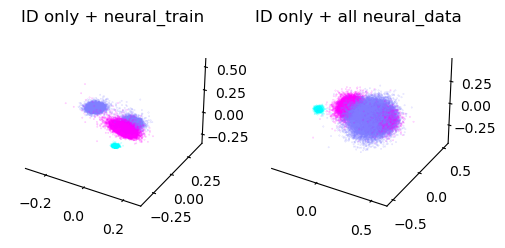

((48928, 32), (61160, 32))

In [456]:
fig=plt.figure(figsize=(9,6))

ax1=plt.subplot(231, projection = '3d')
ax2=plt.subplot(232, projection = '3d')

ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_posdir_train, embedding_labels=label_train[:,0], title='ID only + neural_train')
ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all, embedding_labels=discete_lables[:,0], title='ID only + all neural_data')

plt.show()
cebra_posdir_train.shape, cebra_pos_all.shape

load cebra-time models (not trained with lables)

Text(0.5, 0.98, 'CEBRA-Time Model, Mthal')

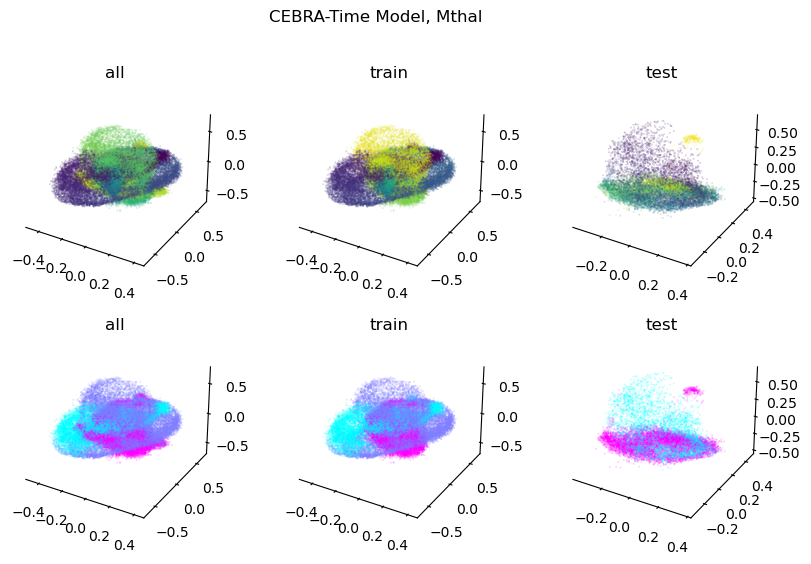

In [457]:
path_0 = "reach1_4_50msFr_0.001LR_1000MI_outDim32_B_2024-03-29_19-31-13_timeOnly.cebra"
path_0 = 'reach1_4_50msFr_0.001LR_1500MI_outDim32_B_2024-04-02_13-07-00_timeOnly.cebra'

cebra_time_model = cebra.CEBRA.load(f'time_only_models/{path_0}')
cebra_time_all = cebra_time_model.transform(neural_data_transposed)
cebra_time_train = cebra_time_model.transform(neural_train)
cebra_time_test = cebra_time_model.transform(neural_test)

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column


ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_time_all, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_time_train, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_time_test, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_time_all, embedding_labels=discete_lables[:,0], title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_time_train, embedding_labels=label_train[:,0], title='train')
ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_time_test, embedding_labels=label_test[:,0], title='test')
# add title
plt.suptitle('CEBRA-Time Model, Mthal')

In [458]:
mthal_embedding_train = cebra_time_train
mthal_embedding_all = cebra_time_all

### 1.2 Load in M1 data 


In [459]:
probe = 'A' # probe used for the neural data
P = probe

load full neural data

In [471]:
pre_reach_str = str(pre_reach)
if pre_reach < 1:
    window_size = f'{pre_reach_str[0]}{pre_reach_str[-1]}_{post_reach}_timeWindow'
if pre_reach >= 1:
    window_size = f'{pre_reach_str}_{post_reach}_timeWindow'

# the path to the .npy file for the neural data (structred as firing rates x time x neurons)
neural_data_path =f'neural_data/{mouse}_{bin_size_in_ms}ms_FR_{window_size}_{probe}.npy'

# load the neural data
neural_data = cebra.load_data(neural_data_path)
print(neural_data.shape)
neural_data_transposed = neural_data.T  # This changes shape to (58380, 538)
print(neural_data_transposed.shape)
m1_neural_data = neural_data_transposed
m1_neural_data_orignal = neural_data

(45, 61160)
(61160, 45)


load neural_data (test and train)

In [461]:
def split_data(data, test_ratio):

    split_idx = int(len(data)* (1-test_ratio))
    neural_train = neural_data_transposed[:split_idx]
    neural_test = neural_data_transposed[split_idx:]
    label_train = discete_lables[:split_idx]
    label_test = discete_lables[split_idx:]

    return neural_train, neural_test, label_train, label_test

neural_train, neural_test, label_train, label_test = split_data(neural_data_transposed, 0.2)
neural_train.shape, neural_test.shape, label_train.shape, label_test.shape

((48928, 45), (12232, 45), (48928, 2), (12232, 2))

load cebra models and make embeddings

In [462]:
MI = 5000 # maximum number of iterations
OD =32 # output dimension
P = 'A' # probe letter

In [463]:
np.unique(label_train[:,0]), np.unique(label_train[:,1])

(array([0., 1., 2.]), array([0., 1.]))

In [464]:
# We get train set embedding and test set embedding.
cebra_posdir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_trialID_SucessFailure_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_posdir_train = cebra_posdir_model.transform(neural_train)
cebra_posdir_test = cebra_posdir_model.transform(neural_test)

cebra_pos_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_trialID_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_pos_train = cebra_pos_model.transform(neural_train)
cebra_pos_test = cebra_pos_model.transform(neural_test)

cebra_dir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_SucessFailure_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_dir_train = cebra_dir_model.transform(neural_train)
cebra_dir_test = cebra_dir_model.transform(neural_test)

cebra_pos_all = cebra_pos_model.transform(neural_data_transposed)
cebra_dir_all = cebra_dir_model.transform(neural_data_transposed)
cebra_posdir_all = cebra_posdir_model.transform(neural_data_transposed)

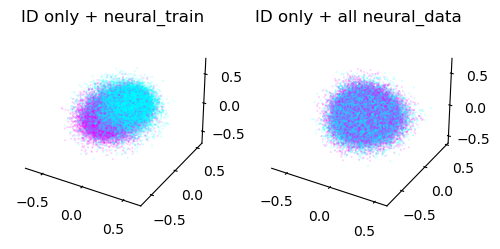

((48928, 32), (61160, 32))

In [465]:
fig=plt.figure(figsize=(9,6))

ax1=plt.subplot(231, projection = '3d')
ax2=plt.subplot(232, projection = '3d')

ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_posdir_train, embedding_labels=label_train[:,1], title='ID only + neural_train')
ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all, embedding_labels=discete_lables[:,1], title='ID only + all neural_data')

plt.show()
cebra_posdir_train.shape, cebra_pos_all.shape

In [466]:
m1_embedding_train= cebra_posdir_train
m1_embedding_all = cebra_pos_all

Text(0.5, 0.98, 'CEBRA-Time Model, M1')

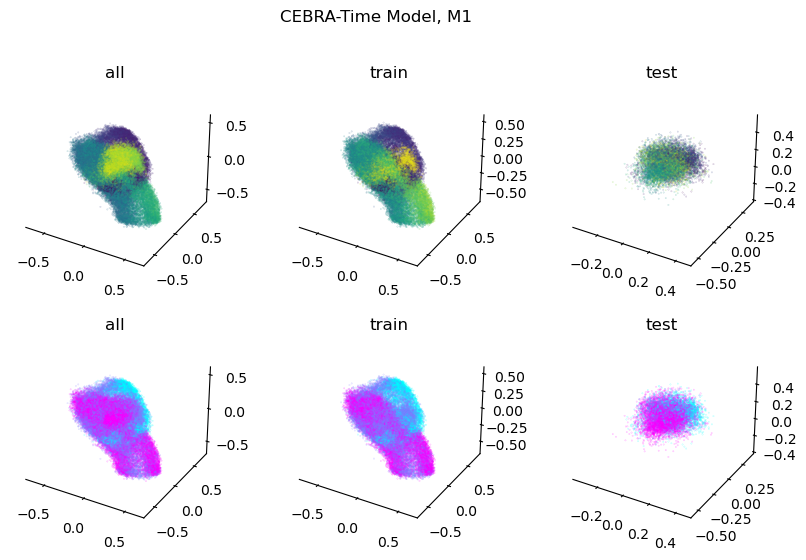

In [467]:
path_0 = 'reach1_4_50msFr_0.001LR_1500MI_outDim20_A_2024-04-01_18-58-59_timeOnly.cebra'

cebra_time_model = cebra.CEBRA.load(f'time_only_models/{path_0}')
cebra_time_all = cebra_time_model.transform(neural_data_transposed)
cebra_time_train = cebra_time_model.transform(neural_train)
cebra_time_test = cebra_time_model.transform(neural_test)

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column


ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_time_all, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_time_train, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_time_test, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_time_all, embedding_labels=discete_lables[:,0], title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_time_train, embedding_labels=label_train[:,0], title='train')
ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_time_test, embedding_labels=label_test[:,0], title='test')
# add title
plt.suptitle('CEBRA-Time Model, M1')

In [468]:
m1_embedding_train = cebra_time_train
m1_embedding_all = cebra_time_all


### 4. Convert Data into correctly shapped df

Turning neural_data and embedding data into to a df that is time bins by units for neural data. Or timebins by embeddings for embedding data
- you need each row to be a single time bin
- each column is a unit. 


In [501]:
# Conver neural data into a df that is (bins , features) = (units, timebins)
data_mthal_neuralData_T = data_mthal_neuralData.T
data_mthal_neuralData = pd.DataFrame(data_mthal_neuralData_T)
data_mthal_neuralData = data_mthal_neuralData.ffill()
print(data_mthal_neuralData.shape)
data_mthal_neuralData.head(2)

(61160, 538)


0    1    2    3     4     5     6    7    8    9    ...  528   529  530  \
0  0.0  0.0  0.0  0.0  40.0  20.0  40.0  0.0  0.0  0.0  ...  0.0  20.0  0.0   
1  0.0  0.0  0.0  0.0  40.0  20.0   0.0  0.0  0.0  0.0  ...  0.0   0.0  0.0   

   531  532  533  534   535  536  537  
0  0.0  0.0  0.0  0.0  20.0  0.0  0.0  
1  0.0  0.0  0.0  0.0   0.0  0.0  0.0  

[2 rows x 538 columns]

In [502]:
# Conver neural data into a df that is (bins , features) = (units, timebins)\
data_m1_neuralData_T = data_m1_neuralData.T
data_m1_neuralData = pd.DataFrame(data_m1_neuralData_T)
data_m1_neuralData = data_m1_neuralData.ffill()
print(data_m1_neuralData.shape)
data_m1_neuralData.head(2)

(61160, 45)


0     1     2    3     4     5     6     7    8    9   ...   35   36  \
0   0.0  40.0  80.0  0.0  60.0  20.0  80.0  20.0  0.0  0.0  ...  0.0  0.0   
1  20.0  80.0  40.0  0.0  40.0   0.0  80.0  20.0  0.0  0.0  ...  0.0  0.0   

    37   38   39   40   41   42   43   44  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[2 rows x 45 columns]

In [506]:
# Conver neural embeddings into a df that is (bins , features) = (units, embeddings)
data_m1_embedding_T = data_m1_embedding.T
data_m1_embedding = pd.DataFrame(data_m1_embedding_T)
data_m1_embedding = data_m1_embedding.ffill()
print(data_m1_embedding.shape)
data_m1_embedding.head(2)

(61160, 20)


0         1         2         3         4         5         6   \
0 -0.073559  0.244736 -0.168670  0.215833  0.158538  0.287898 -0.344083   
1 -0.083142  0.241025 -0.165788  0.212391  0.172290  0.288479 -0.341305   

         7         8         9         10        11        12        13  \
0  0.228503 -0.337931 -0.316527  0.154006 -0.364403  0.045566  0.254337   
1  0.232745 -0.348225 -0.320974  0.155636 -0.359394  0.052284  0.244396   

         14        15        16        17        18        19  
0  0.083812 -0.245759  0.024908  0.083340  0.139286 -0.221331  
1  0.087638 -0.240951  0.023535  0.090644  0.141055 -0.210465

In [507]:
# Conver neural embeddings into a df that is (bins , features) = (units, embeddings)
data_mthal_embedding_T =data_mthal_embedding.T
data_mthal_embedding = pd.DataFrame(data_mthal_embedding_T)
data_mthal_embedding = data_mthal_embedding.ffill()
print(data_mthal_embedding.shape)
data_mthal_embedding.head(2)

(61160, 32)


0         1         2         3         4         5         6   \
0 -0.015637  0.406981  0.166465 -0.204488  0.064744 -0.065235 -0.321402   
1 -0.025242  0.398936  0.177669 -0.190722  0.069609 -0.072161 -0.324818   

         7         8         9   ...        22        23        24        25  \
0  0.131802  0.132240 -0.042215  ...  0.094831 -0.044322  0.027663 -0.102902   
1  0.124397  0.135454 -0.022158  ...  0.097464 -0.020535  0.002429 -0.099985   

         26        27        28        29        30        31  
0  0.064785  0.053596  0.098654  0.042460  0.062349 -0.119618  
1  0.051914  0.035560  0.096073  0.057147  0.055696 -0.135972  

[2 rows x 32 columns]

Covert which dataframes you want into data, so it can be fit into rest of code

In [ ]:
# data = data_m1_neuralData
# data = data_mthal_neuralData
# data = data_mthal_embedding
# data = data_m1_embedding

uncomment to plot and view a units firing rate

In [519]:
data_mthal_neuralData_T.shape, data_mthal_embedding_T.shape

((61160, 538), (61160, 32))

In [568]:
# Units to view
unit_to_view = 4
second_unit_to_view = 10  # Second unit to display
reaches_to_view = range(0, 1)  # Range of reaches to display

embedding_1 = data_mthal_embedding_T[0].to_numpy()[reach_start:reach_end]
embedding_2 = data_mthal_embedding_T[1].to_numpy()[reach_start:reach_end]
embedding_3 = data_mthal_embedding_T[2].to_numpy()[reach_start:reach_end]

unit_embedding.shape
data_mthal_embedding_T.shape, embedding_1.shape, 


((61160, 32), (220,))

In [621]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit

def view_units(unit_to_view,second_unit_to_view,third_unit_to_view,reaches_to_view):

    # Close any previous plots
    plt.close('all')

    # Create a new figure with a specific size
    fig = plt.figure(figsize=(15, 14))

    # First row
    ax1 = fig.add_subplot(431)  # First row, first column
    ax2 = fig.add_subplot(432)  # First row, second column
    ax3 = fig.add_subplot(433)  # First row, third column

    # Second row
    ax4 = fig.add_subplot(434)  # Second row, first column
    ax5 = fig.add_subplot(435)  # Second row, second column
    ax6 = fig.add_subplot(436)  # Second row, third column

    # Third row
    ax7 = fig.add_subplot(437)  # Third row, first column
    ax8 = fig.add_subplot(438)  # Third row, second column
    ax9 = fig.add_subplot(439)  # Third row, third column

    # Fourth row
    ax10 = fig.add_subplot(4, 3, 10,projection='3d')  # Fourth row, first column
    ax11 = fig.add_subplot(4, 3, 11,projection='3d')  # Fourth row, second column
    ax12 = fig.add_subplot(4, 3, 12, projection='3d')  # Fourth row, third column

 
    # Assuming data_mthal_neuralData_T and data_mthal_embedding_T are correctly set up
    for reach in reaches_to_view:
        # Calculate the start and end indices for each reach
        reach_start = reach * 220
        reach_end = reach_start + 220

        # Fetch data for the specified reach
        unit_frs = data_mthal_neuralData_T[unit_to_view].to_numpy()[reach_start:reach_end]
        second_unit_frs = data_mthal_neuralData_T[second_unit_to_view].to_numpy()[reach_start:reach_end]
        third_unit_frs = data_mthal_neuralData_T[third_unit_to_view].to_numpy()[reach_start:reach_end]


        unit_embedding = data_mthal_embedding_T[0].to_numpy()[reach_start:reach_end]
        second_unit_embedding = data_mthal_embedding_T[1].to_numpy()[reach_start:reach_end]
        third_unit_embedding = data_mthal_embedding_T[2].to_numpy()[reach_start:reach_end]


        embedding_1 = data_mthal_embedding_T[0].to_numpy()[reach_start:reach_end]
        embedding_2 = data_mthal_embedding_T[1].to_numpy()[reach_start:reach_end]
        embedding_3 = data_mthal_embedding_T[2].to_numpy()[reach_start:reach_end]

        
        embedding_1_m1 = data_m1_embedding_T[0].to_numpy()[reach_start:reach_end]
        embedding_2_m1 = data_m1_embedding_T[1].to_numpy()[reach_start:reach_end]
        embedding_3_m1 = data_m1_embedding_T[2].to_numpy()[reach_start:reach_end]

        # Plotting data for the specified reach, first unit
        ax1.plot(unit_frs, label=f'Reach {reach}')
        ax2.plot(second_unit_frs, label=f'Reach {reach}')
        ax3.plot(third_unit_frs, label=f'Reach {reach}')

        # Plotting data for the specified reach, second unit
        ax4.plot(embedding_1, label=f'Reach {reach}')
        ax5.plot(embedding_2, label=f'Reach {reach}')
        ax6.plot(embedding_3,  label=f'Reach {reach}')

        
        # Plotting data for the specified reach, second unit
        ax7.plot(embedding_1_m1, label=f'Reach {reach}')
        ax8.plot(embedding_2_m1, label=f'Reach {reach}')
        ax9.plot(embedding_3_m1,  label=f'Reach {reach}')

        ax10.plot(embedding_1, embedding_2, embedding_3, label=f'Reach {reach}')
        ax11.plot(embedding_1_m1, embedding_2_m1, embedding_3_m1, label=f'Reach {reach}')



    # Adding legends to each subplot
    # for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    #     ax.legend()
    # Setting titles for subplots, first unit
    ax1.set_title(f"Unit {unit_to_view} Firing Rate")
    ax2.set_title(f"Unit {second_unit_to_view} Firing Rate")
    ax3.set_title(f"Unit {third_unit_to_view} Firing Rate")

    # Setting titles for subplots, second unit
    ax4.set_title("Mtahl First Embedding")
    ax5.set_title("Mtahl Second Embedding")
    ax6.set_title("Mtahl Third Embedding")

    ax7.set_title("M1 First Embedding")
    ax8.set_title("M1 Second Embedding")
    ax9.set_title("M1 Third Embedding")

    ax10.set_title("Mthal 3D Embedding")
    ax11.set_title("M1 3D Embedding")



    # Overall title for the figure
    fig.suptitle(f'Units {unit_to_view} & {second_unit_to_view}, Multiple Reaches')

    # Show the plot
    plt.show()


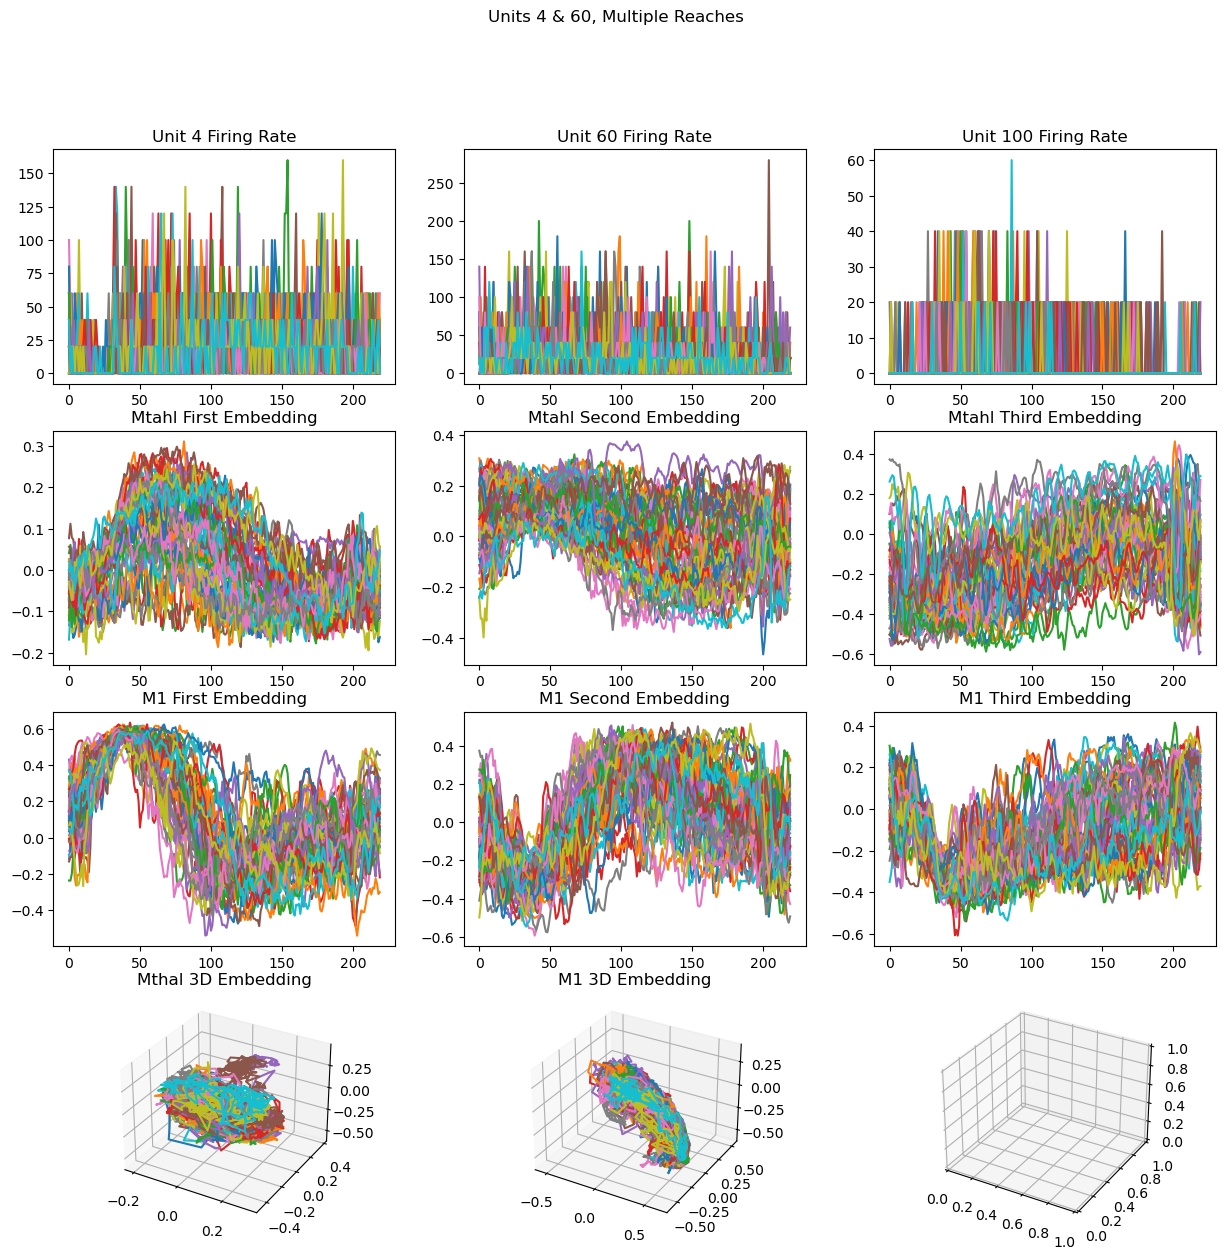

In [624]:
# Units to view
unit_to_view = 4
second_unit_to_view = 60  # Second unit to display
third_unit_frs = 100
reaches_to_view = range(150, 200)  # Range of reaches to display

view_units(unit_to_view,second_unit_to_view,third_unit_frs,reaches_to_view)


In [620]:
from sklearn.preprocessing import StandardScaler
import math

# Define predictors and target
PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

# Scale our data to have mean 0
scaler = StandardScaler()
data[PREDICTORS] = scaler.fit_transform(data[PREDICTORS])

# Split into train, valid, test sets
np.random.seed(0)
split_data = np.split(data, [int(.7*len(data)), int(.85*len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in split_data]
train_x.shape, train_y.shape, valid_x.shape, valid_y.shape, test_x.shape, test_y.shape

KeyError: "None of [Index(['tmax', 'tmin', 'rain'], dtype='object')] are in the [columns]"

In [400]:
data

tmax      tmin      rain  tmax_tomorrow
1970-01-01 -0.727256 -2.271502 -0.253661           52.0
1970-01-02 -1.687794 -1.682598 -0.253661           52.0
1970-01-03 -1.687794 -2.271502 -0.253661           53.0
1970-01-04 -1.567726 -2.124276 -0.253661           52.0
1970-01-05 -1.687794 -2.271502 -0.253661           50.0
...              ...       ...       ...            ...
2022-11-22 -0.487121 -2.271502 -0.253661           67.0
2022-11-23  0.113215 -1.829824 -0.253661           66.0
2022-11-24 -0.006853 -1.388146 -0.253661           70.0
2022-11-25  0.473416 -1.682598 -0.253661           62.0
2022-11-26 -0.487121 -1.388146 -0.253661           64.0

[13509 rows x 4 columns]

### 2. Construct RNN

In [24]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

prepare input and target data

In [25]:
input = train_x
target = train_y
test_input = test_x
test_target = test_y
input.shape, target.shape, test_input.shape,  test_target.shape

((9456, 3), (9456, 1), (2027, 3), (2027, 1))

In [26]:
# Now reshape input and target tensors for the training set
input_tensor = torch.tensor(input)  # Reshape to (222, 210, 32)
target_tensor = torch.tensor(target) # Reshape to (222, 210, 32)
test_input_tensor = torch.tensor(test_input)
test_target_tensor = torch.tensor(test_target)


# Convert the existing tensors to float32 if they are not already
input_tensor = input_tensor.float()
target_tensor = target_tensor.float()
test_input_tensor = test_input_tensor.float()
test_target_tensor = test_target_tensor.float()

# Create a TensorDataset
train_dataset = TensorDataset(input_tensor, target_tensor)
test_dataset = TensorDataset(test_input_tensor, test_target_tensor)



# Optionally create a validation dataset using the remaining data if needed
input_tensor.shape, target_tensor.shape, test_input_tensor.shape, test_target_tensor.shape

(torch.Size([9456, 3]),
 torch.Size([9456, 1]),
 torch.Size([2027, 3]),
 torch.Size([2027, 1]))

In [27]:
from torch.utils.data import TensorDataset, DataLoader, random_split

# # # Create a TensorDataset
# # dataset = TensorDataset(input_tensor, target_tensor)
# # print(len(dataset))

# # # Split into train and validation
# # train_size = int(0.8 * len(dataset))
# # print(train_size)
# # val_size = len(dataset) - train_size
# # train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
# train_dataset = [(input_tensor, target_tensor)]
# val_dataset = [(torch.tensor(valid_x).float(), torch.tensor(valid_y).float())]

# # Create DataLoaders
# batch_size = 64
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

testing batching and randomizing inputs

In [28]:
input_tensor.shape, target_tensor.shape

(torch.Size([9456, 3]), torch.Size([9456, 1]))

In [29]:
from torch.utils.data import Dataset, DataLoader
import random

class WeatherDataset(Dataset):
    def __init__(self, features, labels, sequence_length=7):
        self.features = features
        self.labels = labels
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.labels) - self.sequence_length + 1

    def __getitem__(self, index):
        idx = random.randint(0, len(self.labels) - self.sequence_length)
        return (self.features[idx:idx + self.sequence_length], self.labels[idx:idx + self.sequence_length])

# Assuming 'features' and 'labels' are your full datasets
dataset = WeatherDataset(input_tensor, target_tensor)
train_loader = DataLoader(dataset, batch_size=1, shuffle=True)  # Shuffle here might not be necessary


PyTorch rnn #1
- no dropouts

In [30]:
# Adjusting the model for the specific neural data task
class NeuralRNN(nn.Module):
    def __init__(self, input_size=3, hidden_size=64, num_layers=1, output_size=1):
        super(NeuralRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)  # Apply the linear layer to each time step
        return out

# Create an instance of the NeuralRNN
neural_rnn = NeuralRNN()



pytorch rnn #2
- added drop outs

In [31]:

class NeuralRNN(nn.Module):
    def __init__(self, input_size=3, hidden_size=64, num_layers=1, output_size=1, dropout=0.5):
        super(NeuralRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # Apply dropout to each RNN layer except the last layer
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout if num_layers > 1 else 0)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)  # Apply the linear layer to each time step
        return out

# Create an instance of the NeuralRNN
neural_rnn = NeuralRNN()

### 3. Train RNN 
- Input: Mthal embedding data
- Targert: M1 embedding data
- Output: Predicted M1 embedding data

In [343]:
num_epochs = 1000
lr = 0.001
weight_decay = False
early_stop = True

# Initialize early stopping criteria
early_stopping_patience = 10
min_val_loss = float('inf')
stop_counter = 0

In [344]:
i = 0
for inputs, targets in train_loader:
    i +=1
    print(f'Epoch {i}')
    print(inputs.shape)
    print(targets.shape)
    print(inputs[0][0].shape, inputs[0][0])
    print(targets[0][0].shape, targets[0][0])

Epoch 1
torch.Size([1, 7, 3])
torch.Size([1, 7, 1])
torch.Size([3]) tensor([ 0.2333, -0.2103, -0.2537])
torch.Size([1]) tensor([72.])
Epoch 2
torch.Size([1, 7, 3])
torch.Size([1, 7, 1])
torch.Size([3]) tensor([-0.7273, -0.3576, -0.1983])
torch.Size([1]) tensor([56.])
Epoch 3
torch.Size([1, 7, 3])
torch.Size([1, 7, 1])
torch.Size([3]) tensor([-0.1269, -1.3881, -0.2537])
torch.Size([1]) tensor([60.])
Epoch 4
torch.Size([1, 7, 3])
torch.Size([1, 7, 1])
torch.Size([3]) tensor([-0.7273,  0.0841, -0.2537])
torch.Size([1]) tensor([63.])
Epoch 5
torch.Size([1, 7, 3])
torch.Size([1, 7, 1])
torch.Size([3]) tensor([ 0.7136,  0.2313, -0.2537])
torch.Size([1]) tensor([63.])
Epoch 6
torch.Size([1, 7, 3])
torch.Size([1, 7, 1])
torch.Size([3]) tensor([-1.8079, -0.5048, -0.2537])
torch.Size([1]) tensor([53.])
Epoch 7
torch.Size([1, 7, 3])
torch.Size([1, 7, 1])
torch.Size([3]) tensor([-0.4871,  0.5258,  2.4600])
torch.Size([1]) tensor([58.])
Epoch 8
torch.Size([1, 7, 3])
torch.Size([1, 7, 1])
torch.Size

In [345]:

for inputs, targets in val_loader:
    print(inputs.shape)
    print(targets.shape)
    print(inputs[0][1].shape, inputs[0][1])
    print(targets[0][1].shape, targets[0][1])
    break


torch.Size([1, 2026, 3])
torch.Size([1, 2026, 1])
torch.Size([3]) tensor([ 2.2744,  0.5258, -0.2537])
torch.Size([1]) tensor([72.])


In [346]:
import torch
loss_function = torch.nn.MSELoss()  # Mean Squared Error Loss, or choose another appropriate to your task


optimizer = torch.optim.Adam(neural_rnn.parameters(), lr=lr)  # Using Adam optimizer

if weight_decay:
    optimizer = torch.optim.Adam(neural_rnn.parameters(), lr=lr, weight_decay=0.01)  # Adding L2 regularization

predictions = []
valid_predictions = []
weight_history = []
# Assuming neural_rnn, train_loader, and val_loader are already defined
for epoch in range(num_epochs):
    # Training phase
   
    neural_rnn.train()  # Set the model to training mode
    train_loss = 0.0
    all_outputs = []
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear the gradients
        outputs = neural_rnn(inputs)  # Forward pass: compute the output
        loss = loss_function(outputs, targets)
           # Print epoch statistics every 100 epochs
        if epoch % 20 == 0:
            print(epoch)
            print(inputs[0][epoch])
            print(targets[0][epoch])
            print(outputs[0,:,:])
            print(outputs[0,:,:].shape)
            print('')
        loss.backward()  # Backward pass: compute the gradient of the loss with respect to model parameters
        optimizer.step()  # Update parameters
        train_loss += loss.item() * inputs.size(0)  # Multiply by batch size to undo averaging in loss calculation
        all_outputs.append(outputs)

        # Save weights
        layer_weights = {name: parameter.data.clone() for name, parameter in neural_rnn.named_parameters()}
        weight_history.append(layer_weights)
    all_outputs = torch.cat(all_outputs, dim=0)  # Concatenate along the batch dimension
    train_loss /= len(train_loader.dataset)  # Average loss for the epoch

    # Validation phase
    neural_rnn.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    all_val_outputs = []
    with torch.no_grad():  # Turn off gradients for validation, saves memory and computations
        for inputs, targets in val_loader:
            outputs_val = neural_rnn(inputs)
            loss = loss_function(outputs_val, targets)
            val_loss += loss.item() * inputs.size(0)
            if epoch % 20 == 0:
                print('val')
                print(inputs[0][epoch])
                print(targets[0][epoch])
                print(outputs_val[0][epoch])
                print('')
            all_val_outputs.append(outputs_val)

    all_val_outputs = torch.cat(all_val_outputs, dim=0)  
    val_loss /= len(val_loader.dataset)  # Average loss for the epoch

    
    # # Early stopping check
    if early_stop:
        if val_loss < min_val_loss:
            min_val_loss = val_loss
            stop_counter = 0  # reset the counter if improvement is seen
        else:
            stop_counter += 1
        if stop_counter >= early_stopping_patience:
            print(f"Stopping early at epoch {epoch+1}")
            break

    # Print epoch statistics every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch+1} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {val_loss:.4f}')


0
tensor([-0.4871,  0.5258,  0.4663])
tensor([64.])
tensor([[-0.0267],
        [ 0.0305],
        [ 0.0355],
        [-0.1360],
        [ 0.0202],
        [ 0.0459],
        [ 0.0049]], grad_fn=<SliceBackward0>)
torch.Size([7, 1])

0
tensor([-0.1269, -0.0631, -0.2537])
tensor([63.])
tensor([[ 0.0204],
        [ 0.0505],
        [ 0.0844],
        [ 0.0554],
        [ 0.0716],
        [-0.1629],
        [ 0.0049]], grad_fn=<SliceBackward0>)
torch.Size([7, 1])

0
tensor([-2.4082, -2.1243, -0.2537])
tensor([54.])
tensor([[0.0340],
        [0.1146],
        [0.1413],
        [0.1219],
        [0.1116],
        [0.1070],
        [0.1201]], grad_fn=<SliceBackward0>)
torch.Size([7, 1])

0
tensor([-1.6878, -1.6826, -0.2537])
tensor([52.])
tensor([[0.0548],
        [0.1622],
        [0.2140],
        [0.0986],
        [0.1909],
        [0.2037],
        [0.1772]], grad_fn=<SliceBackward0>)
torch.Size([7, 1])

0
tensor([ 0.2333,  0.9675, -0.2537])
tensor([66.])
tensor([[0.0469],
        [0.0925]

0
tensor([-0.4871, -0.0631,  5.0628])
tensor([62.])
tensor([[ 0.7392],
        [ 5.5970],
        [11.1094],
        [11.3836],
        [11.3854],
        [11.3854],
        [11.3854]], grad_fn=<SliceBackward0>)
torch.Size([7, 1])

0
tensor([-0.7273, -2.2715, -0.2537])
tensor([56.])
tensor([[ 2.6679],
        [ 9.7264],
        [11.4397],
        [11.4566],
        [11.4566],
        [11.4570],
        [11.4570]], grad_fn=<SliceBackward0>)
torch.Size([7, 1])

0
tensor([-0.6072, -0.7992,  5.6166])
tensor([60.])
tensor([[ 0.5806],
        [ 5.1590],
        [11.1206],
        [11.5170],
        [11.5272],
        [11.5273],
        [11.5271]], grad_fn=<SliceBackward0>)
torch.Size([7, 1])

0
tensor([ 0.4734,  0.6730, -0.2537])
tensor([68.])
tensor([[ 2.9491],
        [10.1602],
        [11.5860],
        [11.5978],
        [11.5979],
        [11.5979],
        [11.5979]], grad_fn=<SliceBackward0>)
torch.Size([7, 1])

0
tensor([-0.4871,  0.0841, -0.2537])
tensor([64.])
tensor([[ 3.0179],
 

In [353]:
train_x[-1], train_y[-1],
train_y.shape, train_x.shape

((9456, 1), (9456, 3))

In [354]:
output_predictions = all_outputs.detach().numpy()
print(output_predictions.shape)
output_predictions = output_predictions.squeeze(axis=2)
output_predictions_batch1 = output_predictions[:,0]
output_predictions_batch2 = output_predictions[:,1]
output_predictions_batch3 = output_predictions[:,2]
output_predictions_batch4 = output_predictions[:,3]
output_predictions_batch5 = output_predictions[:,4]
output_predictions_batch6 = output_predictions[:,5]
output_predictions_batch7 = output_predictions[:,6]

output_predictions_batch1.shape

(9450, 7, 1)


(9450,)

In [355]:
print(train_y.shape)
target_weather = train_y.squeeze(axis=1)
target_weather.shape

(9456, 1)


(9456,)

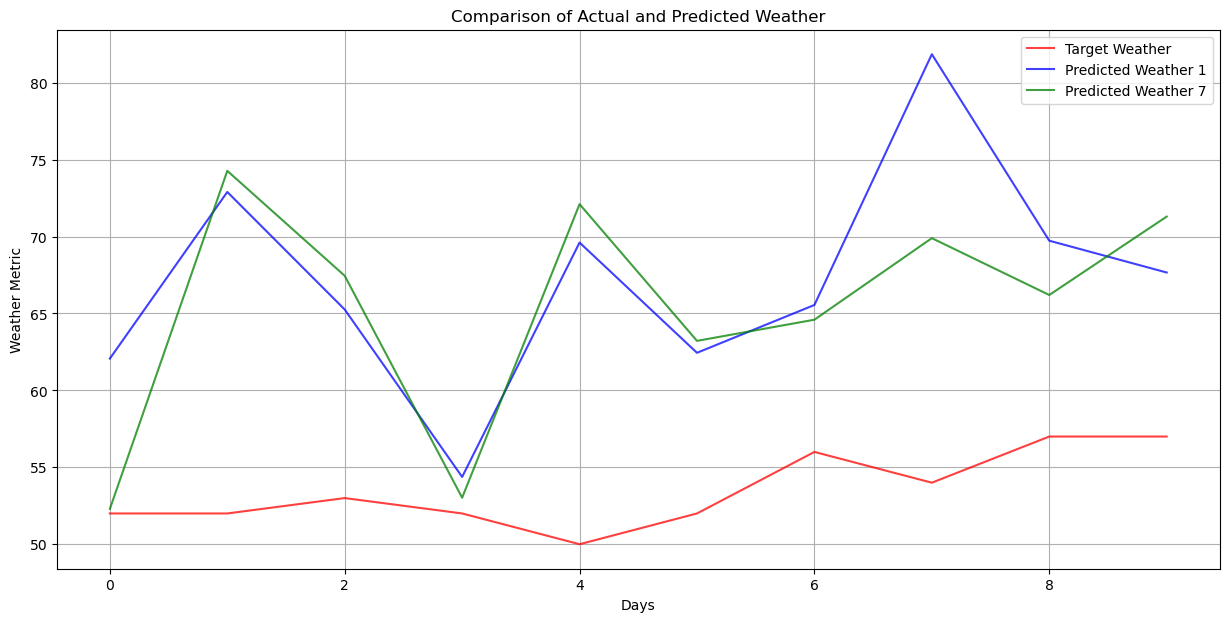

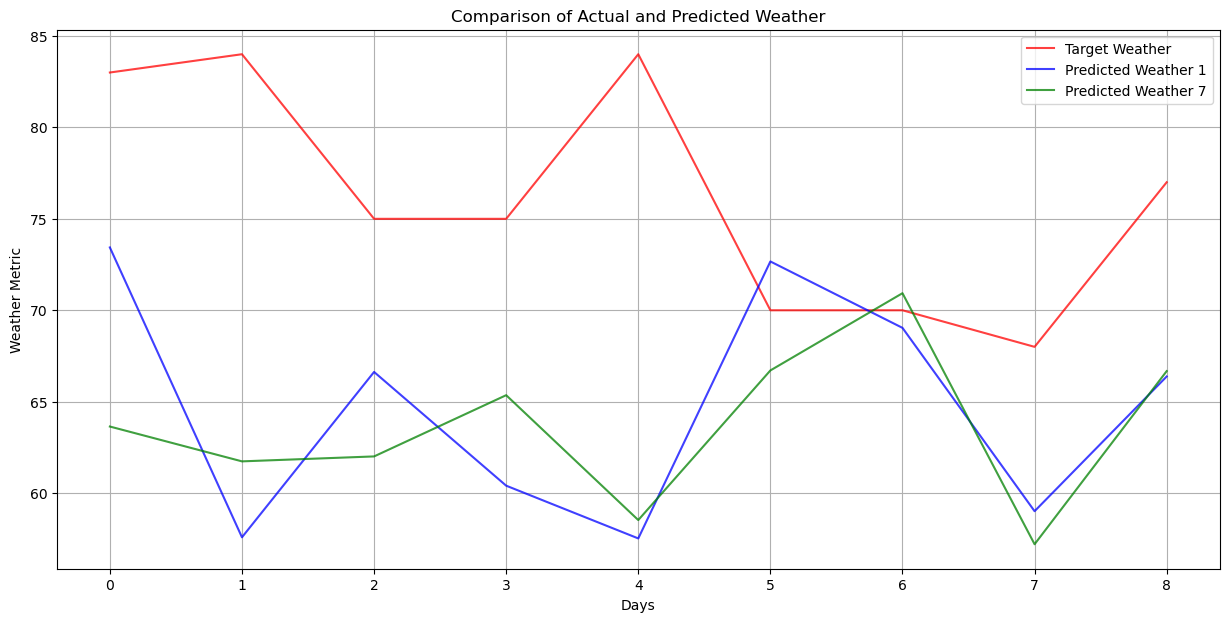

In [356]:
import matplotlib.pyplot as plt

day_start = 0
day_end = 10
plt.figure(figsize=(15, 7))
# plt.plot(targets, label='Actual Weather', color='blue', alpha=0.75)
plt.plot(target_weather[day_start:day_end], label='Target Weather', linestyle='-', color='red', alpha=0.75)
plt.plot(output_predictions_batch1[day_start:day_end], label='Predicted Weather 1', linestyle='-', color='blue', alpha=0.75)
plt.plot(output_predictions_batch7[day_start:day_end], label='Predicted Weather 7', linestyle='-', color='green', alpha=0.75)

plt.title('Comparison of Actual and Predicted Weather')
plt.xlabel('Days')
plt.ylabel('Weather Metric')
plt.legend()
plt.grid(True)
plt.show()

day_start = -10
day_end = -1
plt.figure(figsize=(15, 7))
# plt.plot(targets, label='Actual Weather', color='blue', alpha=0.75)
plt.plot(target_weather[day_start:day_end], label='Target Weather', linestyle='-', color='red', alpha=0.75)
plt.plot(output_predictions_batch1[day_start:day_end], label='Predicted Weather 1', linestyle='-', color='blue', alpha=0.75)
plt.plot(output_predictions_batch7[day_start:day_end], label='Predicted Weather 7', linestyle='-', color='green', alpha=0.75)

plt.title('Comparison of Actual and Predicted Weather')
plt.xlabel('Days')
plt.ylabel('Weather Metric')
plt.legend()
plt.grid(True)
plt.show()

### 4. Test rnn on unseen data

In [357]:
test_input_tensor.shape, test_target_tensor.shape

(torch.Size([2027, 3]), torch.Size([2027, 1]))

create dataloader for unseen test data (data witheld from both training and validation)

In [358]:
from torch.utils.data import Dataset, DataLoader
import torch

class SequentialWeatherDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)  # shape: [2027, 3]
        self.labels = torch.tensor(labels, dtype=torch.float32)  # shape: [2027, 1]

    def __len__(self):
        return len(self.features) - 7 + 1  # Account for the last 7-day window

    def __getitem__(self, index):
        # Return 7 consecutive days of features and labels
        return self.features[index:index + 7], self.labels[index:index + 7]

# Assuming test_input_tensor and test_target_tensor are your datasets
test_dataset = SequentialWeatherDataset(test_input_tensor, test_target_tensor)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


C:\Users\user\AppData\Local\Temp\ipykernel_1116\2933115460.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.features = torch.tensor(features, dtype=torch.float32)  # shape: [2027, 3]
C:\Users\user\AppData\Local\Temp\ipykernel_1116\2933115460.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = torch.tensor(labels, dtype=torch.float32)  # shape: [2027, 1]


Run a single pass of the already trained rnn on this unseen data
- makes prediction on unseen data (does not update the rnn in anyway)

In [359]:
neural_rnn.eval()  # Set the model to evaluation mode
test_predictions = []
test_targets = []
test_losses = []

with torch.no_grad():  # No gradients needed for evaluation, which saves memory and computations
    for inputs, targets in test_loader:
        outputs = neural_rnn(inputs)
        loss = loss_function(outputs, targets)
        test_losses.append(loss.item())
        test_predictions.extend(outputs.cpu().numpy())
        test_targets.extend(targets.cpu().numpy())

test_weather_predictions = np.array(test_predictions)
test_weather_targets = np.array(test_targets)
print(test_weather_predictions.shape, test_weather_targets.shape)
# Calculate average test loss
average_test_loss = sum(test_losses) / len(test_losses)
print(f"Average Test Loss: {average_test_loss:.4f}")


(2021, 7, 1) (2021, 7, 1)
Average Test Loss: 22.6742


evaluate rnn's prediction on unseen data

In [360]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Flatten the lists if they are nested due to sequence predictions
test_predictions = [item for sublist in test_predictions for item in sublist]
test_targets = [item for sublist in test_targets for item in sublist]

mse = mean_squared_error(test_targets, test_predictions)
mae = mean_absolute_error(test_targets, test_predictions)

print(f"Mean Squared Error on Test Set: {mse:.4f}")
print(f"Mean Absolute Error on Test Set: {mae:.4f}")


Mean Squared Error on Test Set: 22.6742
Mean Absolute Error on Test Set: 3.4539


extract out rnn's prediction from output_tensor

In [361]:
print(test_weather_predictions.shape, test_weather_targets.shape)

test_targets_weather = test_weather_targets.squeeze(axis =2)
test_targets_weather_1 = test_targets_weather[:,0]
test_targets_weather_2 = test_targets_weather[:,1]

test_predictions_weather = test_weather_predictions.squeeze(axis =2)
test_predictions_weather_1 = test_predictions_weather[:,0]
test_predictions_weather_6 = test_predictions_weather[:,6]
test_predictions_weather_1

(2021, 7, 1) (2021, 7, 1)


plot and compare the rnn's predictions on the unseen data (after just a single pass)

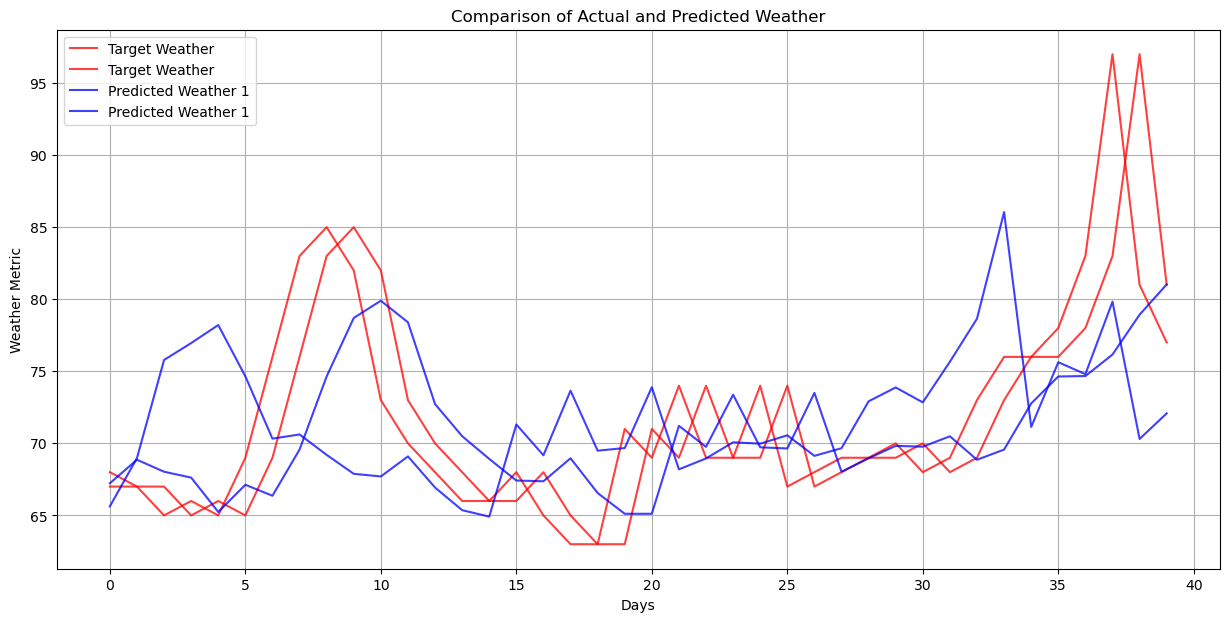

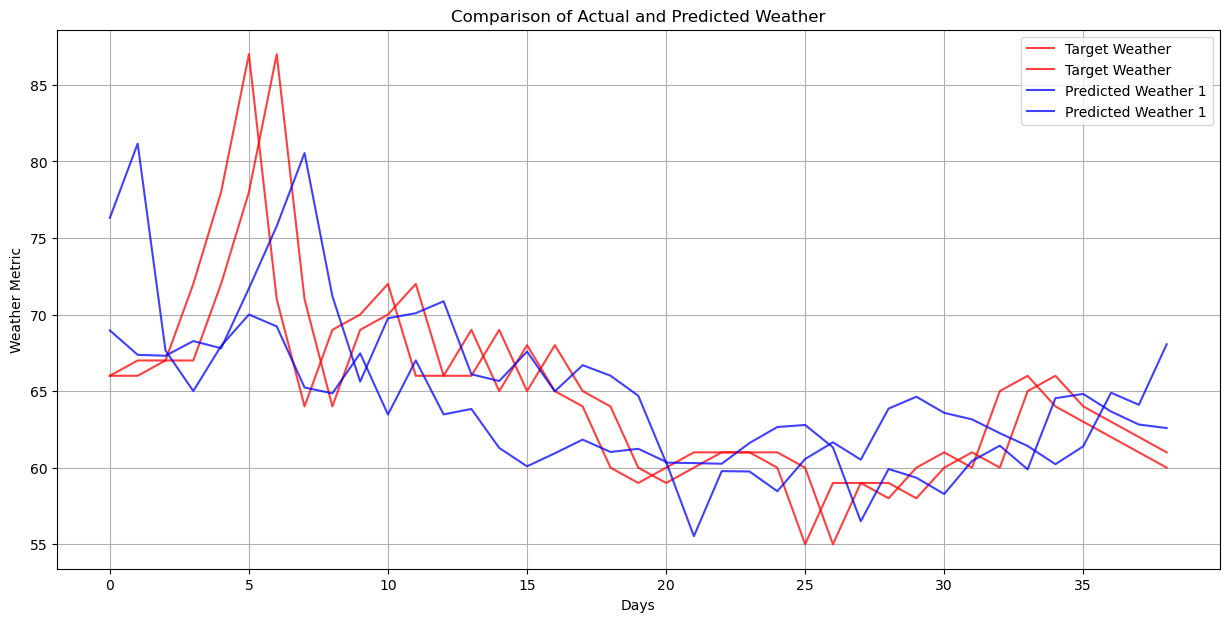

In [366]:
import matplotlib.pyplot as plt

day_start = 0
day_end = 40
plt.figure(figsize=(15, 7))
# plt.plot(targets, label='Actual Weather', color='blue', alpha=0.75)
plt.plot(test_targets_weather_1[day_start:day_end], label='Target Weather', linestyle='-', color='red', alpha=0.75)
plt.plot(test_targets_weather_2[day_start:day_end], label='Target Weather', linestyle='-', color='red', alpha=0.75)

plt.plot(test_predictions_weather_1[day_start:day_end], label='Predicted Weather 1', linestyle='-', color='blue', alpha=0.75)
plt.plot(test_predictions_weather_6[day_start:day_end], label='Predicted Weather 1', linestyle='-', color='blue', alpha=0.75)

plt.title('Comparison of Actual and Predicted Weather')
plt.xlabel('Days')
plt.ylabel('Weather Metric')
plt.legend()
plt.grid(True)
plt.show()

day_start = -40
day_end = -1
plt.figure(figsize=(15, 7))
# plt.plot(targets, label='Actual Weather', color='blue', alpha=0.75)
plt.plot(test_targets_weather_1[day_start:day_end], label='Target Weather', linestyle='-', color='red', alpha=0.75)
plt.plot(test_targets_weather_2[day_start:day_end], label='Target Weather', linestyle='-', color='red', alpha=0.75)

plt.plot(test_predictions_weather_1[day_start:day_end], label='Predicted Weather 1', linestyle='-', color='blue', alpha=0.75)
plt.plot(test_predictions_weather_6[day_start:day_end], label='Predicted Weather 1', linestyle='-', color='blue', alpha=0.75)

plt.title('Comparison of Actual and Predicted Weather')
plt.xlabel('Days')
plt.ylabel('Weather Metric')
plt.legend()
plt.grid(True)
plt.show()


addidtional Model Evaluation Adjustments

In [132]:
def calculate_metrics(outputs, targets):
    # You can define any metric here, such as mean squared error
    mse = nn.MSELoss()(outputs, targets)
    return mse.item()

# Adjust the main training loop to include metric calculation
for epoch in range(num_epochs):
    # Existing training and validation loops here

    # Calculate additional metrics or diagnostics
    train_mse = calculate_metrics(all_outputs, torch.cat([y for _, y in train_loader], dim=0))
    val_mse = calculate_metrics(all_val_outputs, torch.cat([y for _, y in val_loader], dim=0))

    if epoch % 100 == 0:
        print(f'Epoch {epoch+1} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {val_loss:.4f} \tTrain MSE: {train_mse:.4f} \tVal MSE: {val_mse:.4f}')

Epoch 1 	Training Loss: 238.7952 	Validation Loss: 289.6269 	Train MSE: 238.7952 	Val MSE: 289.6269
Epoch 101 	Training Loss: 238.7952 	Validation Loss: 289.6269 	Train MSE: 238.7952 	Val MSE: 289.6269
Epoch 201 	Training Loss: 238.7952 	Validation Loss: 289.6269 	Train MSE: 238.7952 	Val MSE: 289.6269
Epoch 301 	Training Loss: 238.7952 	Validation Loss: 289.6269 	Train MSE: 238.7952 	Val MSE: 289.6269
Epoch 401 	Training Loss: 238.7952 	Validation Loss: 289.6269 	Train MSE: 238.7952 	Val MSE: 289.6269
Epoch 501 	Training Loss: 238.7952 	Validation Loss: 289.6269 	Train MSE: 238.7952 	Val MSE: 289.6269
Epoch 601 	Training Loss: 238.7952 	Validation Loss: 289.6269 	Train MSE: 238.7952 	Val MSE: 289.6269
Epoch 701 	Training Loss: 238.7952 	Validation Loss: 289.6269 	Train MSE: 238.7952 	Val MSE: 289.6269
Epoch 801 	Training Loss: 238.7952 	Validation Loss: 289.6269 	Train MSE: 238.7952 	Val MSE: 289.6269
Epoch 901 	Training Loss: 238.7952 	Validation Loss: 289.6269 	Train MSE: 238.7952 	

In [367]:
from datetime import datetime

# Get the current date and time formatted as a string (e.g., "2023-03-28_15-30-45")
current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [368]:
rnn_save_path = f'rnn_models/rnn_model_{num_epochs}_{mouse}_{current_datetime}.pth'
# Saving the model
torch.save(neural_rnn.state_dict(), rnn_save_path)

# Loading the model
neural_rnn_loaded = NeuralRNN()  # Ensure it has the same architecture
neural_rnn_loaded.load_state_dict(torch.load(rnn_save_path))
neural_rnn_loaded.eval()  # Set to evaluation mode if inference only

# If you want to continue training, switch back to train mode
neural_rnn_loaded.train()


NeuralRNN(
  (rnn): RNN(3, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [76]:
# # Assuming you have tensors input_tensor and target_tensor prepared
# loss_function = torch.nn.MSELoss()  # Mean Squared Error Loss, or choose another appropriate to your task
# optimizer = torch.optim.Adam(neural_rnn.parameters(), lr=0.0003)  # Using Adam optimizer

# num_epochs = 5000

# # Example training loop
# for epoch in range(num_epochs):
#     optimizer.zero_grad()               # Clear existing gradients
#     output_tensor = neural_rnn(input_tensor)  # Get the model's predictions
#     loss = loss_function(output_tensor, target_tensor)  # Calculate the loss
#     loss.backward()                     # Compute gradient of the loss wrt model parameters
#     optimizer.step()    
#                     # Perform a single optimization step
#     # print every 25 epochs
#     if epoch % 150 == 0:
#         print(f"Epoch {epoch}: Loss = {loss.item()}")


### 4. Visualize Embeddings
- Compare cebra M1 embeddings to RNN predicted embeddings

### 5. Decode lables from embeddings
- Decode lables (trial_ID, Success or Failure) from cebra embeddings
- Decode lables (trial_ID, Success or Failure) from RNN predicted embeddings

### 6. Pass real M1 embeddings cerebellar SNN
- See if SNN can predict when their is an error